# Comparative Advantages and Trade

In this project we show the results from by David Ricardos theory on Comparative Advantages in trade.

Imports and set magics:

In [185]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import time
from types import SimpleNamespace

import no_trade as nt
import modelproject as moc

from no_trade import Production_Possibility_Frontiers

import numpy as np
import sympy as sm

from scipy import linalg
from scipy import optimize
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
plt.rcParams.update({"axes.grid": True, "grid.color": "black",
                    "grid.alpha": "0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

*Comparative advantages and trade* 

This project models the optimal production of wine and cloth respectively for England and Portugal when the two countries trade with each other. The table below contrains the number of hours each country spend in producing one piece of the two goods:

| Country   | Cloth | Wine |      
|-----------|-------|------|      
| England   | 100   | 120  |           
| Portugal  | 90    | 80   |

England spends 100 hours in making one piece of cloth and 120 hours in making one bottle of wine. Portugal spends 90 hours producing one piece of cloth and 80 hours producing one bottle of wine. Portugal has an absolut advantage in production of both of the two goods. In the absense of trade, England requires 220 hours of work to produce one unit of each good, and Portugal requires 170 hours of work to produce the same quantities.

If the perspective is one year (i.e. 8760 hours), the maximum output of each of the two goods for each of the countries are as in the table below:

| Country   | Cloth | Wine |      
|-----------|-------|------|      
| England   | 87.6  | 73   |           
| Portugal  | 97.3  | 109.5|

If England speds all their time producing cloth, they ca produce 87.6 pieces of cloth, and if they spend all their time producing wine, they can make 73 bottles in one year. If Portugal spends all their time producing cloth, they can make 97.3 pieces in one year, and if they spend all their time producing wine, they can make 109.5 bottles of wine. 

*Opportunity Costs*

The table below displays the opportunity costs for each country for both of the goods. 

| Country   | OC Cloth | OC Wine |      
|-----------|----------|---------|      
| England   | 0.83     | 1.2     |           
| Portugal  | 1.13     | 0.89    |

It "costs" England 0.83 bottles of wine to produce one piece of cloth whereas it costs Portugal 1.13 bottles of wine to produce one piece of cloth. This implies that England has a comparative advantage in producing cloth. 

It "costs" England 1.2 pieces of clothing to produce one bottle of wine whereas it costs Portugal 0.89 pieces of clothing to produce one bottle of wine. This implies that Portugal has a comparative advantage in producing wine. 

If both countries specialize in their comparative advantage and then trade, they can get outcomes that are beyond each of their individual production possibility frontier (PPF) and thereby achieve a higher utility level compared to the case in which they do not trade with each other. 

The market "price" of cloth when trading will be in between 0.83 and 1.13. In this interval, both parties benefit from the trade as England gets a higher "price" than what it "costs" to produce it, and Portugal "buy" the cloth cheaper than what it would have cost them to produce it themselves. The market "price" for wine when trading will be in between 0.89 and 1.2 for the same reasons as with cloth - just the other way around. To summarize; the market "prices" in these intervals make sence for both countries because the "prices" are lower than their opportunity cost of producing it themselves.

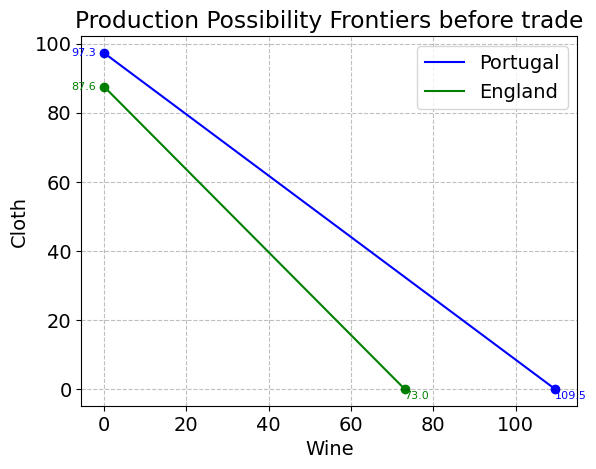

In [186]:
# Plot the Production Possibility Frontiers from before trade: 
model = Production_Possibility_Frontiers() 
model.plot_production_graphs()


In [187]:
from no_trade import no_trade_class as ntc
ntc.portugal_production()
print('\n')
ntc.england_production()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -51.61879502634704
            Iterations: 8
            Function evaluations: 24
            Gradient evaluations: 8
Portugal produces 54.75 units of wine and 48.67 units of cloth.
And, the resulting utility level is 51.62


Optimization terminated successfully    (Exit mode 0)
            Current function value: -39.98374669812673
            Iterations: 10
            Function evaluations: 30
            Gradient evaluations: 10
England produces 36.50 units of wine and 43.80 units of cloth.
And, the resulting utility level is 39.98


Now, according to Ricardo if they were to trade with England they would be able to consume more of both output, given that both England and Portugal were to produce more of the good inwhich they had a comparative advantage. 

If they worked the same number of hours (8760 hours), and traded, taking advantage of their comparative advantages, what would the new comsumption bundels look like?

In [188]:
opt = moc.optimal_trade(do_plot=False, do_print=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -155.9569155279786
            Iterations: 12
            Function evaluations: 108
            Gradient evaluations: 12
The optimal production levels for Portugal are 54.75 units of wine and 21.90 units of cloth
The export of wine from Portugal to England is 0.00 units
The export of cloth from Portugal to England is 21.90 units
The consumption levels for Portugal are 109.50 units of wine and 0.00 units of cloth
The utility for Portugal is 0.00


The optimal production levels for England are 104.02 units of wine and 21.90 units of cloth
The export of wine from England to Portugal is 54.75 units
The export of cloth from England to Portugal is 0.00 units
The consumption levels for England are 49.27 units of wine and 43.80 units of cloth
The utility for England is 46.46


The utililty has increased for both, and they both consume more of both goods. 

One noteable change is that both Portugal and England now consume more of the good they are the least productive in.  

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 


Holding Englands preferences fixed at $\alpha = 0.5$, how does the optimal production/consumption for each of the countries change.



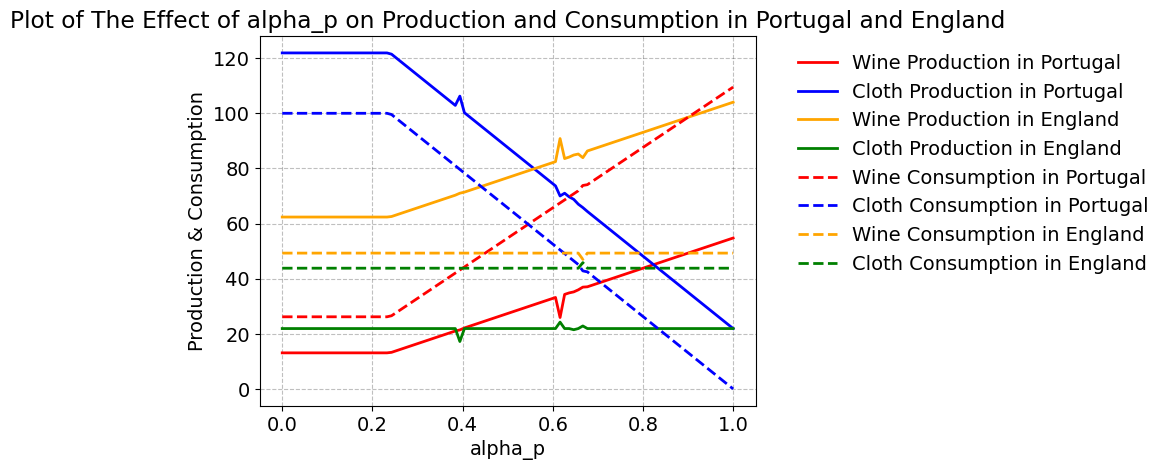

In [189]:
moc.Different_alpha_p(do_plot=True)

# Conclusion

Add concise conclusion. 